In [1]:
import pygsp as p

import numpy as np
from numpy.linalg import matrix_rank, inv, pinv

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2

from scipy import fft

from scipy.sparse.linalg import eigs
from scipy.linalg import eig
from scipy.optimize import linprog, minimize, Bounds

from spielman_learning import *

In [2]:
from ripser import ripser
from persim import plot_diagrams

# Second example from 5.0 fixed

In [3]:
# L0 = np.arange(0, n ** 2, 1).reshape((n, n))
x = np.array([[-2, -1, -1, -0.5, 0, 0.5, 1, 1.5, 2.5], 
              [2, 1, 1, 0.5, 0, -0.5, -1, -1.5, -2.5], 
              [-2, -1, -1, -0.5, 0, 0.5, 1, 1.5, 2.5]]).T
n, m = np.shape(x)
L0 = np.ones((n, n))
ws = L0[np.triu_indices(n, k = 1)]

In [4]:
y, ws = algorithm(x, L0, 6)

L minimized, current iteration: 0 out of 6
Y minimized, current iteration: 0 out of 6
L minimized, current iteration: 1 out of 6
Y minimized, current iteration: 1 out of 6
L minimized, current iteration: 2 out of 6
Y minimized, current iteration: 2 out of 6
L minimized, current iteration: 3 out of 6
Y minimized, current iteration: 3 out of 6
L minimized, current iteration: 4 out of 6
Y minimized, current iteration: 4 out of 6
L minimized, current iteration: 5 out of 6
Y minimized, current iteration: 5 out of 6


In [5]:
ws[np.isclose(ws, 1e-8)] = 0
W, ds = vector_to_matrix(len(x), ws)
L = np.diag(ds) - W

In [6]:
G = p.graphs.Graph(W)
G.set_coordinates()

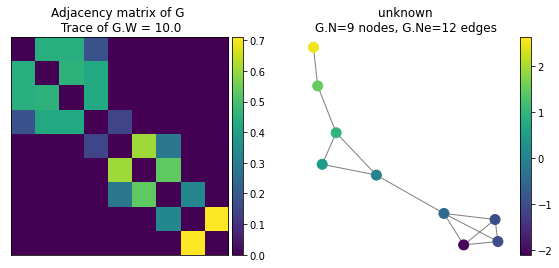

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

adj = ax[0].matshow(G.W.todense())

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(adj, cax, orientation = 'vertical')
ax[0].set_xticks([])
ax[0].set_yticks([])

a = G.plot_signal(x.T[0], ax = ax[1])
ax[1].axis('off')

ax[0].set_title(f'Adjacency matrix of G \n Trace of G.W = %s' %( np.round(np.trace(G.L.todense()), 2)) )
plt.show()

In [8]:
data_rs = np.random.RandomState(12345)

In [9]:
# função que define os dados
def start_points(n = 100, r = 1, eps = 0.2, rs = data_rs):
    ps = []
    thetas = []
    for i in range(n):
        theta = rs.uniform(0, 2 * np.pi)
        eps = rs.uniform(-0.2, 0.2)
        x, y  = (r + eps) * np.cos(theta), (r + eps) * np.sin(theta)
        thetas += [theta]
        ps += [[x,y]]
    return thetas, np.array([np.array(q) for q in ps])

In [10]:
thetas, data = start_points(50)
signal1 = np.array(thetas)
signal2 = np.cos(thetas)
signal3 = np.sin(thetas)

signal = np.array([signal2, signal3]).T


L0 = np.ones((len(signal1), len(signal1)))

In [11]:
%%time
y, ws = algorithm(signal, L0, 1, N = 50)

L minimized, current iteration: 0 out of 1
Y minimized, current iteration: 0 out of 1
CPU times: user 3min 17s, sys: 219 ms, total: 3min 18s
Wall time: 3min 15s


In [12]:
ws[np.isclose(ws, 1e-8)] = 0
W, ds = vector_to_matrix(len(signal), ws)

G = p.graphs.Graph(W)
G.set_coordinates(data)

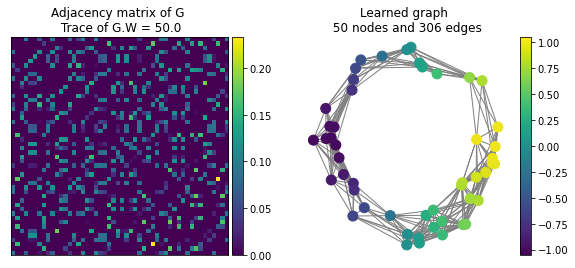

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

adj = ax[0].matshow(G.W.todense())

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size = '5%', pad = 0.05)
fig.colorbar(adj, cax, orientation = 'vertical')
ax[0].set_xticks([])
ax[0].set_yticks([])

a = G.plot_signal(signal2, ax = ax[1])
ax[1].axis('off')

ax[0].set_title(f'Adjacency matrix of G \n Trace of G.W = %s' % (np.round(np.trace(G.L.todense()), 2)))
ax[1].set_title('Learned graph \n %s nodes and %s edges' % (G.N, G.Ne))
plt.show()